<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas 1: *Data Preparation & Dimensionality Reduction***

### **Tenggat Waktu: 2 Oktober 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **2 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [34]:
# Isi dengan data diri Anda
NAMA = "Fahdii Ajmalal Fikrie"
KELAS = "D"
NPM = "1906398370"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    'Abdurrahman Arfan - 1906353901',
    'Ahmad Harori Zaki Ichsan - 1906353965'
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    'https://stackoverflow.com/questions/22257527/how-do-i-get-a-summary-count-of-missing-nan-data-by-column-in-pandas',
    'https://stackoverflow.com/questions/52871044/count-duplicates-in-rows-per-column-in-pandas-dataframe',
    'https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python'
]

In [35]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahdii Ajmalal Fikrie dari kelas D dengan NPM 1906398370, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahdii Ajmalal Fikrie)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.display import display
from pprint import pprint
from scipy.linalg import eigh
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## **Soal 1 — Preprocessing**

### Diberikan sebuah dataset startup_data, tujuan akhir dari pemrosesan data nantinya adalah memprediksi kolom status. Untuk mempersiapkan data tersebut, kerjakan soal-soal berikut!

### 1. [15] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

i. Menampilkan deskripsi setiap atribut data numerikal

In [37]:
# Mengimpor dataset startup_data
startup_df = pd.read_csv('startup_data.csv', index_col=0)

# Menampilkan deskripsi setiap atribut data numerikal
print("Deskripsi dan jumlah setiap atribut/kolom data numerikal")
startup_df.describe()

Deskripsi dan jumlah setiap atribut/kolom data numerikal


,latitude,longitude,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,avg_participants
count,949.000000,949.000000,885.000000,894.000000,946.000000,9.490000e+02,901.000000
mean,38.530398,-103.465916,2.322209,3.987377,2.313953,1.544590e+09,2.857545
std,3.756150,22.382011,2.941926,3.313172,1.402098,2.446676e+10,1.875341
min,25.752358,-122.756956,-9.046600,-9.046600,1.000000,-9.500000e+06,1.000000
25%,37.388869,-122.200914,0.517800,1.690375,1.000000,2.700000e+06,1.500000
50%,37.779281,-118.354605,1.424700,3.494500,2.000000,1.000000e+07,2.500000
75%,40.730646,-77.212493,3.602700,5.543150,3.000000,2.490000e+07,4.000000
max,59.335232,18.057121,34.490400,34.490400,10.000000,6.423100e+11,16.000000


ii. Menampilkan deskripsi setiap atribut data kategorikal

In [38]:
# Menampilkan deskripsi setiap atribut data kategorikal
print("Deskripsi dan jumlah setiap atribut/kolom data kategorikal")
startup_df.describe(include=np)

Deskripsi dan jumlah setiap atribut/kolom data kategorikal


,founded_at,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,is_top500,status
count,949,897,949,949,949,949,949,949,949,949
unique,219,35,2,2,2,2,2,2,2,2
top,1/1/2003,web,No,No,Yes,No,No,No,Yes,acquired
freq,57,142,637,704,479,577,730,855,769,610


iii. Menghitung jumlah null pada setiap kolom

In [39]:
print("Jumlah null pada setiap atribut/kolom")
# Menghitung jumlah null pada setiap kolom
startup_df.isnull().sum()

Jumlah null pada setiap atribut/kolom


latitude                   0
longitude                  0
founded_at                 0
age_first_funding_year    64
age_last_funding_year     55
funding_rounds             3
funding_total_usd          0
category_code             52
has_VC                     0
has_angel                  0
has_seriesA                0
has_seriesB                0
has_seriesC                0
has_seriesD                0
avg_participants          48
is_top500                  0
status                     0
dtype: int64

iv. Menghitung jumlah duplicates pada setiap kolom

In [40]:
print("Jumlah duplikasi data pada setiap atribut/kolom")
# Menghitung jumlah duplicates pada setiap kolom
startup_df.duplicated().sum()

Jumlah duplikasi data pada setiap atribut/kolom


26

v. Menghitung jumlah outliers pada setiap kolom

In [41]:
print("Jumlah outliers pada setiap atribut/kolom")
Q1 = startup_df.quantile(0.25)
Q3 = startup_df.quantile(0.75)
IQR = Q3 - Q1
# Menghitung jumlah outliers pada setiap kolom
((startup_df < (Q1 - 1.5 * IQR)) | (startup_df > (Q3 + 1.5 * IQR))).sum()

Jumlah outliers pada setiap atribut/kolom


/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_14096/3444929081.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((startup_df < (Q1 - 1.5 * IQR)) | (startup_df > (Q3 + 1.5 * IQR))).sum()


age_first_funding_year    24
age_last_funding_year     17
avg_participants          24
category_code              0
founded_at                 0
funding_rounds            18
funding_total_usd         71
has_VC                     0
has_angel                  0
has_seriesA                0
has_seriesB                0
has_seriesC                0
has_seriesD                0
is_top500                  0
latitude                  81
longitude                  4
status                     0
dtype: int64

### 2. [10] Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (Hint: Anda bisa mencari hubungan antar atribut atau melakukan visualisasi sederhana dari atribut tertentu)

i. Statistik Deskriptif

Melakukan eksplorasi dengan melihat komponen-komponen statistik deskriptif dari dataset

In [42]:
startup_df.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,avg_participants
count,949.000000,949.000000,885.000000,894.000000,946.000000,9.490000e+02,901.000000
mean,38.530398,-103.465916,2.322209,3.987377,2.313953,1.544590e+09,2.857545
std,3.756150,22.382011,2.941926,3.313172,1.402098,2.446676e+10,1.875341
min,25.752358,-122.756956,-9.046600,-9.046600,1.000000,-9.500000e+06,1.000000
25%,37.388869,-122.200914,0.517800,1.690375,1.000000,2.700000e+06,1.500000
50%,37.779281,-118.354605,1.424700,3.494500,2.000000,1.000000e+07,2.500000
75%,40.730646,-77.212493,3.602700,5.543150,3.000000,2.490000e+07,4.000000
max,59.335232,18.057121,34.490400,34.490400,10.000000,6.423100e+11,16.000000


ii. Visualisasi

In [43]:
# ii. Visualisasi


iii. Visualisasi

In [44]:
# iii. Korelasi

### 3. [15] Lakukan penanganan terhadap missing values, duplikasi data, dan outliers jika ada!

i.  Melakukan deepcopy pada dataframe `startup_df`

In [45]:
cleaned_startup_df = startup_df.copy(deep=True)
print(cleaned_startup_df.shape)

(949, 17)


ii. Melakukan cleaning terhadap NaN/missing values pada dataframe

In [46]:
cleaned_startup_df = cleaned_startup_df.dropna()
print(cleaned_startup_df.shape)


(753, 17)


iii. Melakukan cleaning terhadap duplikasi data

In [47]:
cleaned_startup_df = cleaned_startup_df.drop_duplicates()
print(cleaned_startup_df.shape)

(734, 17)


iv. Melakukan cleaning terhadap outliers

In [48]:
cleaned_startup_df = cleaned_startup_df[~((cleaned_startup_df < (Q1 - 1.5 * IQR)) |(cleaned_startup_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(cleaned_startup_df.shape)

(576, 17)


/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_14096/1794230506.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cleaned_startup_df = cleaned_startup_df[~((cleaned_startup_df < (Q1 - 1.5 * IQR)) |(cleaned_startup_df > (Q3 + 1.5 * IQR))).any(axis=1)]


### 4. [10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

## **Soal 2 — Dimensionality Reduction**

### Diberikan sebuah dataset cancer_reg, lalu lakukanlah dimensionality reduction dengan mengikuti instruksi berikut!

### 5. [10] Visualisasikan dataset tersebut dengan menggunakan t-SNE! (2 komponen)

i. Mengimpor dataset cancer_reg

In [49]:
cancer_df = pd.read_csv('cancer_reg.csv', index_col=0)

display(cancer_df)

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,BirthRate
avgAnnCount,,,,,,,,,,,,,
1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,6.118831
173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,4.333096
102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,3.729488
427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,4.603841
57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,2.08,51.0,7.773512
1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,2.90,52.6,8.186470
1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,3.04,54.8,7.809192


ii. Membagi data menjadi X dan y (kelas) dan melakukan standardisasi data

In [50]:
X = cancer_df.copy(deep=True)
del X['TARGET_deathRate']
y  = cancer_df[['TARGET_deathRate']]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

iii. Melakukan inisiasi processor tsne

In [51]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_std)
z.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3047 samples in 0.003s...
[t-SNE] Computed neighbors for 3047 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3047
[t-SNE] Computed conditional probabilities for sample 2000 / 3047
[t-SNE] Computed conditional probabilities for sample 3000 / 3047
[t-SNE] Computed conditional probabilities for sample 3047 / 3047
[t-SNE] Mean sigma: 0.601417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.571091
[t-SNE] KL divergence after 1000 iterations: 1.520444


(3047, 2)

iv. Melakukan visualisasi hasil reduksi dimensi t-SNE dengan scatter plot

[Text(0.5, 1.0, 'Cancer Reg data w/ t-SNE projection')]

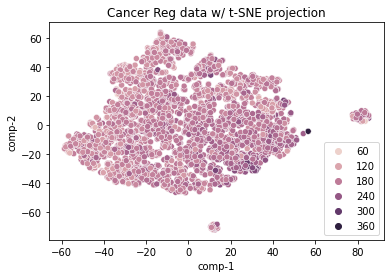

In [52]:
df_tsne = pd.DataFrame()
df_tsne["y"] = y
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
                data=df_tsne).set(title="Cancer Reg data w/ t-SNE projection")

### 6. [20] Implementasikan step-by-step PCA secara manual pada data hasil preprocessing! Pilih jumlah komponen utama yang menurut Anda sebaiknya digunakan sehingga dapat menggambarkan data dengan baik. Sertakan juga alasan yang mendasari Anda melakukan pemilihan tersebut! (Hint: Anda bisa menggunakan rasio kumulatif dari nilai eigen ke-i sebagai persentase variance yang dapat di-cover oleh i nilai eigen tertinggi) Catatan: penggunaan library yang diperbolehkan pada implementasi hanya library numpy dan pandas

i. Mengimpor dataset dan membagi data menjadi X dan y (target)

In [53]:
cancer_df_pca = cancer_df.copy(deep=True)

X_pca = cancer_df_pca.copy(deep=True)
del X_pca['TARGET_deathRate']
y_pca  = cancer_df_pca[['TARGET_deathRate']]

ii. Melakukan standardisasi data

In [54]:
X_pca_std = scaler.fit_transform(X_pca)

iii. Menghitung covariance matriks

In [55]:
cov_mat_pca = np.cov(X_pca_std.T)

print(cov_mat_pca)

[[ 1.0003283   0.06271044  0.22328004  0.97795501 -0.06693991  0.06350917
  -0.0246068  -0.14853595 -0.14411651  0.08618976 -0.18108854 -0.07444445]
 [ 0.06271044  1.0003283  -0.00103653  0.02692119  0.00904922  0.077308
   0.01809511 -0.01473807 -0.00910855 -0.11843884 -0.11956372 -0.11822009]
 [ 0.22328004 -0.00103653  1.0003283   0.23560018 -0.78922426  0.04401721
  -0.01329211 -0.09169273 -0.15332872  0.1121021   0.35523945 -0.0101979 ]
 [ 0.97795501  0.02692119  0.23560018  1.0003283  -0.06532059  0.05573981
  -0.02522727 -0.17666562 -0.17799074  0.10997654 -0.16051596 -0.05775913]
 [-0.06693991  0.00904922 -0.78922426 -0.06532059  1.0003283  -0.05567062
  -0.02928961 -0.21407131 -0.14821218  0.074332   -0.64306792 -0.01228654]
 [ 0.06350917  0.077308    0.04401721  0.05573981 -0.05567062  1.0003283
  -0.02603835 -0.03665932 -0.03058708 -0.00407222 -0.03815578  0.0106797 ]
 [-0.0246068   0.01809511 -0.01329211 -0.02522727 -0.02928961 -0.02603835
   1.0003283   0.12916187  0.124719

iv. Menghitung eigenvalues & eigenvectors

In [56]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat_pca)

print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.29758157 -0.3952277  -0.44856263 -0.70541834 -0.05693172  0.01787605
   0.07095326 -0.19132011  0.02839391 -0.06865994 -0.07510776  0.00753007]
 [-0.03319919  0.00540575 -0.21045694  0.02063422  0.01874136  0.00392513
   0.06354304  0.67485421  0.4656408  -0.4944972   0.13424764  0.12225737]
 [ 0.0288317  -0.55527105  0.2529652  -0.02436384  0.59297895  0.03742218
  -0.45813878  0.17380984 -0.09671585  0.02384785  0.14740393 -0.03849355]
 [-0.30764008 -0.40137971 -0.41901701  0.70406954  0.02970391 -0.01882191
   0.12130451 -0.21823476  0.01665599 -0.05968847 -0.07401798  0.00813376]
 [-0.25290989  0.52566186 -0.2196761  -0.04637156  0.75044322  0.02759729
   0.10509994 -0.15399474  0.07806047  0.00815839 -0.06301934  0.02213218]
 [-0.04186899 -0.06954971 -0.04024727  0.00156616  0.03307636 -0.00242572
   0.04167069  0.41112648 -0.0445387   0.45915811 -0.67326661  0.3922096 ]
 [ 0.09999805  0.00344331 -0.09838906 -0.00338487  0.00569329  0.00394497
   0.03467906 -0.1

v. Memilih k-komponen utama

In [57]:
# Membuat list dari list [index, eigenvalue, eigenvector]
eig_pairs = [[i, np. abs(eig_vals[i]), eig_vecs[:,i]] for i in range(len(eig_vals))]

# Mengurutkan eig_pairs dari nilai eigen tertinggi ke terendah
eig_pairs.sort()
eig_pairs.reverse()

In [58]:
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0], i[1])

Eigenvalues in descending order:
11 0.9764753893134619
10 0.9984521525671345
9 0.8734288059062548
8 0.7263910271073728
7 1.139201032206714
6 0.3673558166200141
5 0.061783924779544794
4 0.12413501644044818
3 0.02013111140913405
2 1.6522229158038046
1 2.291716760457359
0 2.772645640297487


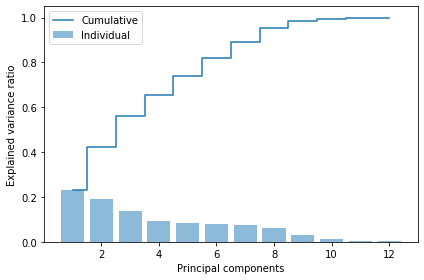

In [59]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eig_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eig_vals), reverse=True)]

cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha=0.5, align='center', label='Individual')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid',  label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

vi. Membuat matriks proyeksi W dari 2 vektor eigen yang dipilih

In [60]:
matrix_w = list()
for i in range(8):
    matrix_w.append(list(eig_pairs[i][2]))

matrix_w = np.transpose(matrix_w)

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.00753007 -0.07510776 -0.06865994  0.02839391 -0.19132011  0.07095326
   0.01787605 -0.05693172]
 [ 0.12225737  0.13424764 -0.4944972   0.4656408   0.67485421  0.06354304
   0.00392513  0.01874136]
 [-0.03849355  0.14740393  0.02384785 -0.09671585  0.17380984 -0.45813878
   0.03742218  0.59297895]
 [ 0.00813376 -0.07401798 -0.05968847  0.01665599 -0.21823476  0.12130451
  -0.01882191  0.02970391]
 [ 0.02213218 -0.06301934  0.00815839  0.07806047 -0.15399474  0.10509994
   0.02759729  0.75044322]
 [ 0.3922096  -0.67326661  0.45915811 -0.0445387   0.41112648  0.04167069
  -0.00242572  0.03307636]
 [ 0.83907546  0.48067876  0.07124539 -0.16144565 -0.11316251  0.03467906
   0.00394497  0.00569329]
 [-0.02333811 -0.07537174  0.0794426   0.23352153 -0.13573169 -0.2007287
  -0.71396867  0.08161694]
 [-0.0195746  -0.09707903  0.06688727  0.2124828  -0.13926516 -0.2709072
   0.69380442 -0.00210796]
 [ 0.08888671  0.12331431  0.37820226  0.78382498 -0.21606154 -0.06682442
   0.014

vii. Mendapatkan subruang 2-dimensi Y berdasarkan hasil dot produk matriks W dengan X_std

In [61]:
Y = X_pca_std.dot(matrix_w)

display(Y)
display(Y.shape)

array([[ 0.28595568, -0.29593488, -0.27810307, ..., -0.34342708,
         0.33590728,  0.0563302 ],
       [-0.58894537,  0.56920067,  0.3437642 , ..., -0.04480937,
        -0.16508056, -0.11649888],
       [-0.66012253,  0.32894209,  1.64259891, ..., -0.20108851,
        -0.08838537, -0.0425509 ],
       ...,
       [ 1.6314569 , -2.39368688,  1.06618273, ...,  0.83242704,
        -0.16815754, -0.02495628],
       [ 0.11257319, -0.17081364, -0.7984867 , ...,  0.49072329,
         0.20726817, -0.03738391],
       [ 0.30442416, -0.28342172, -1.38043838, ...,  1.87268773,
        -0.02922163, -0.6366731 ]])

(3047, 8)

### 7. [10] Implementasikan PCA menggunakan library scikit-learn dengan:

### a. Jumlah komponen utama sebanyak 2. Visualisasikan hasil transformasi dengan menggunakan scatter plot!

i. Melakukan reduksi dimensi dengan pendekatan PCA menggunakan API dari sklearn

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_std)
skl_pca.shape

(3047, 2)

ii. Visualisasi hasil penerapan PCA dua dimensi

In [65]:
y = cancer_df.iloc[:,2].values
skl_pca = np.vstack((skl_pca.T, y)).T
principalDf = pd.DataFrame(data = skl_pca, columns = ['principal component 1', 'principal component 2', 'label'])

sns.scatterplot(x="principal component 1", y="principal component 2", hue=principalDf.label.tolist(),
                palette=sns.color_palette("magma", as_cmap=True),
                data=principalDf)

(3047,)
(3, 3047)


ValueError: Shape of passed values is (3047, 4), indices imply (3047, 3)

### b. Jumlah komponen utama yang sama pada nomor 6. Tampilkan hasil transformasi beserta dengan nilai eigen dari implementasi tersebut!

In [64]:
print("Hasil transformasi:")
print(skl_pca)
print("Nilai eigen:")
print(eig_vals)

Hasil transformasi:
[[ 4.18589055e-01  1.64275949e+00  4.89800000e+02]
 [ 1.77658731e+00 -5.66241926e-01  4.11600000e+02]
 [-1.15783588e+00  1.95077958e-01  3.49700000e+02]
 ...
 [ 2.02808313e+00  6.43799316e-01  4.53549422e+02]
 [-2.40351914e-01  5.61314130e-01  4.53549422e+02]
 [ 2.34094589e+00  2.07667798e-01  4.53549422e+02]]
Nilai eigen:
[2.77264564 2.29171676 1.65222292 0.02013111 0.12413502 0.06178392
 0.36735582 1.13920103 0.72639103 0.87342881 0.99845215 0.97647539]


### 8. [10] Berikan analisis Anda secara singkat mengenai perbedaan:

### a. Hasil yang Anda dapatkan pada nomor 5 dan nomor 7a!

Pada nomor 5, terlihat bahwa hasil pada nomor 5 terlihat lebih 'scattered' dibanding pada nomor 7a. Meskipun pada nomor 7a, pemrosesan PCA hanya direduksi menjadi dua dimensi, terlihat bahwa t-SNE tidak lebih efektif daripada PCA dalam melakukan normalisasi data cancer_reg.

### b. Hasil yang Anda dapatkan pada nomor 6 dan nomor 7b!

Pada hasil nomor 6, yaitu hasil subruang 2D Y, terlihat bahwa hasil transformasi memiliki dimensi yang berbeda dengan matriks Y, yang merupakan hasil kali matriks W dengan matriks X yang sudah distandarisasi.